<a href="https://colab.research.google.com/github/Cyusa8/ML-projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Setup your environment**

*   List item
*   List item



In [ ]:
#load required modules
#general module
import io
import zipfile
import requests
from io import BytesIO
#import data module
import numpy as np
import pandas as pd
#import machine learning module
import keras
#data visualisation module
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
#load the dataset and create a pandas dataframe
chicago_taxi_dataset = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv') #this is the path to the csv file that contains the dataset

In [ ]:
#'update dataframes to use specific columns which will provide good table or dataframe for easy visualisation of data in a table'
#we store dataset into training_df(a new dataframe)
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]
print('Reading dataset complete successfully')
a = len(training_df.index)
#now we are going to set nbr of rows of our table (dataframe => training_df) calculates and dispay nbr of rows and .format inserts the value in the string
print(f'Table number of rows:{0}\n\n')
#this code displays 200 rows of our table starting from the head
training_df.head(500)

Reading dataset complete successfully
Table number of rows:0




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
495,0.53,320,5.25,Flash Cab,Cash,0.0
496,0.54,326,5.25,Flash Cab,Cash,0.0
497,0.58,350,5.50,City Service,Mobile,21.8
498,1.39,838,9.00,City Service,Credit Card,20.8


# **2.Dataset Exploration**

In [ ]:
#Dataset exploration
#We need descriptive statistics of our dataframe
#we first calculate display a table and insert the nbr of rows in the string
#we first define a rangeindex to arrange our dataset by rows by default
p = training_df.index
print(f"total numbers of rows:{p}",len(p))
# calculate and display stats for 'all' columns by ".describe()" method
training_df.describe(include = 'all')
#"Given the data in you dataframe there a lot of questions that can be asked
#regarding the features of our dataframe so we need to calculate and display
#all these stats so as to be able to answer all these questions"

total numbers of rows:RangeIndex(start=0, stop=31694, step=1) 31694


,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In machine learning, a correlation matrix shows how strongly features (like distance and duration) relate to the target (like taxi fare).

1.0: Strong positive relationship (both increase together).
-1.0: Strong negative relationship (one increases, the other decreases).
0.0: No relationship.
Higher absolute values (closer to 1 or -1) mean better predictive power.

In [ ]:
#Generate correlation matrix Correlation analysis: Helps identify potentially important features for the model (those with strong correlations to the target variable).
#Visualizations: Assist in understanding feature interactions and potential transformations needed.
#we need correlation as to find relationship  between features as to produce a model with hign accuracy prediction
#we utilise ".corr()"method
training_df.corr(numeric_only=True)
#we have to inform the .corr() method that it should only consider numeric columns due to corr being a math concept that needs to be calculated
#we make sure to specify that we need relationship between numeric values only

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


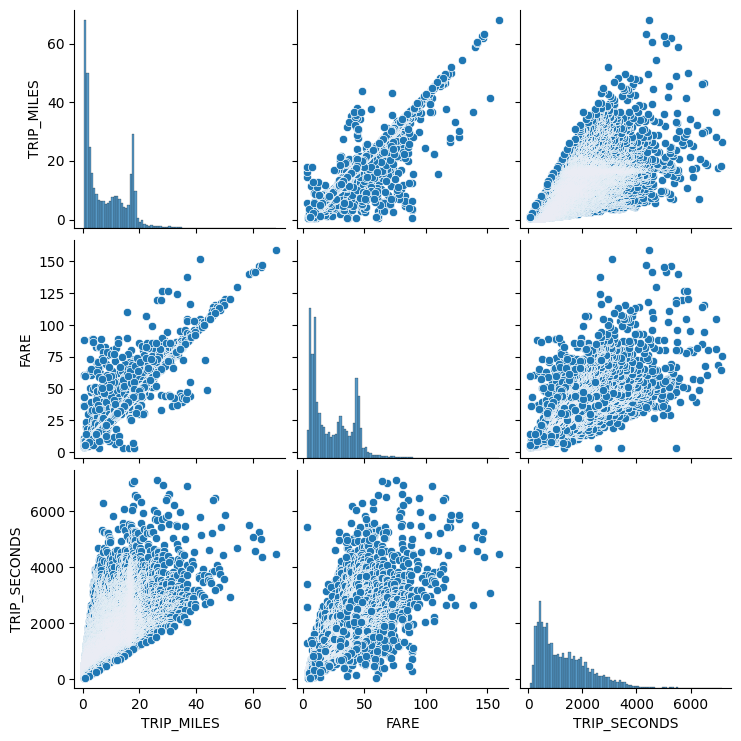

In [ ]:
#We need visuals of the relationships, so as to make informed decisions
sns.pairplot(training_df, x_vars=['TRIP_MILES', 'FARE', 'TRIP_SECONDS'], y_vars=['TRIP_MILES', 'FARE', 'TRIP_SECONDS'])
#we've created a pairplot using seaborn pairplot and we will be plotting the following data in the our dataframe on both x-axis and y-axis

# 3.Train Model

To better understand how well the model is learning, two plots will be generated after each training run:

Scatter Plot – Shows the relationship between the features and the label, with a line representing the model’s predictions. This helps visualize how well the model fits the data.

Loss Curve – Displays how the model's loss changes over time during training. A decreasing loss indicates that the model is learning.

These plots help track progress and identify potential issues in training. You don’t need to understand the plotting code, just how to interpret the results.



In [ ]:
#@title Define plotting functions

# This function creates and displays two plots: a loss curve and a model plot.
def make_plots(df, feature_names, label_name, model_output, sample_size=200):
  """
  Generates and displays two plots: a loss curve and a model plot.

  Args:
    df: The pandas DataFrame containing the data.
    feature_names: A list of the features(elements to use when predicting) used in the model.
    label_name: The name of the label or target variable.
    model_output: A tuple containing the model's weights, bias, epochs, and RMSE.
    sample_size: The number of data points to sample for plotting (default: 200).
  """

  # Take a random sample of the data for plotting.
  random_sample = df.sample(n=sample_size).copy()
  # Reset the index of the sample.
  random_sample.reset_index()
  # Unpack the model output into weights, bias, epochs, and RMSE.
  weights, bias, epochs, rmse = model_output

  # Determine if it's a 2D or 3D plot based on the number of features.
  is_2d_plot = len(feature_names) == 1
  # Set the plot type accordingly ("scatter" for 2D, "surface" for 3D).
  model_plot_type = "scatter" if is_2d_plot else "surface"
  # Create a subplot figure with two panels: one for the loss curve and one for the model plot.
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  # Call the plot_data function to plot the actual data points.
  plot_data(random_sample, feature_names, label_name, fig)
  # Call the plot_model function to plot the model's predictions.
  plot_model(random_sample, feature_names, weights, bias, fig)
  # Call the plot_loss_curve function to plot the model's loss over epochs.
  plot_loss_curve(epochs, rmse, fig)

  # Display the figure.
  fig.show()
  return

# This function plots the loss curve of the model.
def plot_loss_curve(epochs, rmse, fig):
  """
  Plots the loss curve of the model.

  Args:
    epochs: A list of epoch numbers.
    rmse: A list of corresponding RMSE values.
    fig: The Plotly figure to add the loss curve to.
  """
  # Create a line plot of the RMSE values over epochs.
  curve = px.line(x=epochs, y=rmse)
  # Customize the line color and width.
  curve.update_traces(line_color='#ff0000', line_width=3)

  # Add the loss curve to the first subplot (row 1, column 1).
  fig.append_trace(curve.data[0], row=1, col=1)
  # Set the x-axis title to "Epoch".
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  # Set the y-axis title to "Root Mean Squared Error" and adjust the range.
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

# This function plots the actual data points.
def plot_data(df, features, label, fig):
  """
  Plots the actual data points.

  Args:
    df: The pandas DataFrame containing the data.
    features: A list of feature names to plot.
    label: The name of the label or target variable.
    fig: The Plotly figure to add the data plot to.
  """
  # Create a scatter plot (2D or 3D depending on the number of features).
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  # Add the scatter plot to the second subplot (row 1, column 2).
  fig.append_trace(scatter.data[0], row=1, col=2)
  # Set the axis titles according to the features and label.
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

# This function plots the model's predictions.
def plot_model(df, features, weights, bias, fig):
  """
  Plots the model's predictions.

  Args:
    df: The pandas DataFrame containing the data.
    features: A list of feature names used in the model.
    weights: The model's weights.
    bias: The model's bias.
    fig: The Plotly figure to add the model plot to.
  """
  # Calculate the predicted values using the model's equation.
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  # Create a line plot (2D or surface plot for 3D) for the model's predictions.
  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  # Add the model plot to the second subplot (row 1, column 2).
  fig.add_trace(model.data[0], row=1, col=2)

  return

# This function generates information about the model, including weights, bias, and the model's equation.
def model_info(feature_names, label_name, model_output):
  """
  Generates information about the model, including weights, bias, and the model's equation.

  Args:
    feature_names: A list of feature names used in the model.
    label_name: The name of the label or target variable.
    model_output: A tuple containing the model's weights and bias.

  Returns:
    A formatted string containing the model information.
  """
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


# Define linear regression **model**

In [ ]:
#Build a model function (build and compile a simple linear regression model)
def build_model(my_learning_rate, num_feature):

  # Define the input layer.
  # shape=(num_features,) specifies the shape of the input data.
  inputs = keras.Input(shape=(num_feature,))

  # Define the output layer.
  # units=1 means the output layer has a single neuron (for regression).
  outputs = keras.layers.Dense(units=1)(inputs)

  # Create the Keras model by specifying inputs and outputs.
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model.
  # Optimizer: RMSprop (Root Mean Square Propagation) with the given learning rate.
  # Loss function: Mean Squared Error (common for regression).
  # Metric: Root Mean Squared Error (for evaluation).
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss='mean_squared_error',
                metrics=[keras.metrics.RootMeanSquaredError()])

  # Return the compiled model.
  return model

''' After  building our model we need to train it by feeding it data '''
#define a function to train the model
def train_model (model, df, features, label, epochs, batchsize): #Fixed indentation here
  #Feed our model the data
  history = model.fit(x=features, y=label, batch_size=batchsize, epochs=epochs)
  #gather trained model's weight and bias and store
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1] #Fixed: get_bias() to get_weights()[1] to get bias

  #We store epochs separately from the rest of the history
  epochs = history.epoch

  #We Isolate errors for each epoch note that Epoch simply means nbr of training iterations
  hist = pd.DataFrame(history.history)

  #we track the progress of our model by taking snapshots of our model's rmse at each epoch(iteration)
  rmse = hist['root_mean_squared_error'] #Fixed: using string 'root_mean_squared_error' to access column

  return trained_weight, trained_bias, epochs, rmse


#Define run_experiment function
def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):
  #display info message about the experiment
  print('INFO: Start training experiment with features={} and label={}\n'.format(feature_names, label_name))
  num_feature = len(feature_names) #calculate the nbr of features being used

  '''We extract feature and label values and store them in separate variables(features, label)
  the ".value" is to convert the values into numpy arrays for better computation and "df.loc"
  specifies which column to extract from the dataframe'''
  #Fixed indentation here
  features = df.loc[:,feature_names].values #Fixed: feature_name to feature_names, .value to .values
  label = df[label_name].values #Fixed: df[:,label_name].value to df[label_name].values for correct column selection

  #model building and training
  model = build_model(learning_rate, num_feature)
  model_output = train_model(model, df, features, label, epochs, batch_size) #Fixed indentation here

  #Display results and visualisation
  print('\n SUCCESS:Training Experiment Complete\n')
  print('\n{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  #Return trained model
  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


# **Experiments:**
Now that we've built our model it needs to be trained through experiments to see how it works.

features = ['TRIP_MILES']

features is assigned a list containing the string 'TRIP_MILES'. We use square brackets [ ] to create a list in Python.
This indicates that the model will use the values in the 'TRIP_MILES' column of the dataframe as input features to predict the target variable (label).
Why a list? Even though we're using only one feature here (TRIP_MILES), the model is designed to handle multiple features. Using a list allows for flexibility to easily add more features later (like TRIP_SECONDS, etc.).
label = 'FARE'

label is assigned a single string value 'FARE'.
This indicates that the model will be trained to predict the values in the 'FARE' column of the dataframe. This is the target or the outcome we're interested in.
Why not a list? In supervised learning, there's typically only one target variable (or label) we're trying to predict. Therefore, there's no need to use a list here.

In [ ]:
#Experiment 1
#initialise hyperparameters
learning_rate = 0.001 #too big model learns too fast might miss something too small model learns so slow and might take you time
epochs = 20 #iterations to go through while adjusting our bias and weights to achieve good prediction power
batch_size = 50 #this is the size of data to be used in each through each iteration

#specify label and features
feature = ['TRIP_MILES']
label = 'FARE'

#call the run experiment function

model_1 = run_experiment (training_df, feature, label, learning_rate, epochs, batch_size)

INFO: Start training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 350.1993 - root_mean_squared_error: 18.6898  
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 138.7949 - root_mean_squared_error: 11.7435  
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 35.7411 - root_mean_squared_error: 5.9441
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 18.1281 - root_mean_squared_error: 4.2564
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 16.7455 - root_mean_squared_error: 4.0861
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15.9312 - root_mean_squared_error: 3.9883  
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.8647 - root_mean_squared_error: 3.7193  
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.8972 - root_mean_squared_error: 3.7206  
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.2008 - root_mean_squared_

# **Experiment with hyperparameters:**
Experiment 1: Increase the learning rate to 1 (batch size at 50).
Conclusion: too big learning rate loss: 47.5058 - root_mean_squared_error: 6.8881  


Experiment 2: Decrease the learning rate to 0.0001 (batch size at 50).
Conclusion: Almost good learning rate loss: 19.9438 - root_mean_squared_error: 4.4600  

Experiment 3: Increase the batch size to 500 (learning rate at 0.001).
Conclusion: Batch_size too big which spiked the loss: 917.7925 - root_mean_squared_error: 30.2930

In [ ]:
#experiment 1.2

learning_rate = 0.001 #learning rate should be a float
epoch2 = 20
batch_size2 = 50

feature2 = ['TRIP_MILES']
label2 = 'FARE'

model_2 = run_experiment(training_df, feature2, label2, learning_rate, epoch2, batch_size2)


INFO: Start training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1354.6138 - root_mean_squared_error: 36.7905
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 875.4421 - root_mean_squared_error: 29.5689  
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 502.5874 - root_mean_squared_error: 22.3946
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 238.2457 - root_mean_squared_error: 15.4016  
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 73.1019 - root_mean_squared_error: 8.5125
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17.8931 - root_mean_squared_error: 4.2147
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 14.8695 - root_mean_squared_error: 3.8484
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.9541 - root_mean_squared_error: 3.8526  
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.7927 - root_mean_squared_er

# **Experimenting with 2 features**
As we use more features the chances of making the best prediction increase and so is the accuracy of our  model

In [ ]:
#Experiment 3

learning_rate = 0.001
epoch = 20
batch_size = 50

#we convert trip_seconds to trip_minutes and store the value in new column of our training_df called ['TRIP_MINUTES]
training_df.loc[:, 'TRIP_MINUTES'] = training_df['TRIP_SECONDS'] / 60

feature = ['TRIP_MILES', 'TRIP_MINUTES']
label = 'FARE'

model_3 = run_experiment(training_df, feature, label, learning_rate, epoch, batch_size)
#

INFO: Start training experiment with features=['TRIP_MILES', 'TRIP_MINUTES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2721.6096 - root_mean_squared_error: 52.0503
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 812.0766 - root_mean_squared_error: 28.3292
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55.9942 - root_mean_squared_error: 7.2967  
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.1436 - root_mean_squared_error: 3.6186
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.1160 - root_mean_squared_error: 3.3245
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.0213 - root_mean_squared_error: 3.3140  
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.3496 - root_mean_squared_error: 3.5089  
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7853 - root_mean_squared_error: 3.5661
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.0988 - root_mean_

# **4.Validate Model**

